In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import matplotlib.ticker as ticker

In [ ]:
artists_dataset = pd.read_csv('dataset/tabular/artists.csv')
tracks_dataset = pd.read_csv('dataset/tabular/tracks.csv')

In [8]:
tracks_dataset

,id,name,disc_number,duration_ms,explicit,popularity,track_number,artists,album_type,album_name,...,features_duration_ms,time_signature,start_of_fade_out,tempo_confidence,time_signature_confidence,key_confidence,mode_confidence,n_beats,n_bars,genre
0,4rjA5kJJWbwU1prXCvg6Fk,Grey,1,290479,False,52,5,Kölsch,album,1989,...,290479,3,275.90530,0.020,1.000,0.500,0.525,705.0,234.0,minimal-techno
1,6xzpUzzIquIyUzTLbbgSdI,Thrown,1,539229,False,45,5,Kiasmos,album,Kiasmos,...,539229,4,517.28253,0.678,0.326,0.410,0.589,1074.0,269.0,minimal-techno
2,56tXgHlSHCfgmGhwVXNizc,Routine,1,264200,False,39,5,Joris Delacroix,album,Night Visions,...,264200,3,259.04180,0.847,0.457,0.904,0.760,516.0,171.0,minimal-techno
3,0s3wIBczp6TdSJ2y8cveJl,Confronted - Anfisa Letyago Stranger Remix,1,387413,False,0,6,Pan-Pot;Anfisa Letyago,single,Confronted Remixes,...,387414,4,387.41360,0.882,0.498,0.512,0.503,826.0,207.0,minimal-techno
4,4PSbDDd1LRYMhqPXvza6I2,Jupiter Sunrise,1,248956,False,0,1,Kollektiv Turmstrasse,compilation,10 Years Diynamic,...,248957,4,239.63574,0.882,1.000,0.474,0.459,493.0,123.0,minimal-techno
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109542,0wiDjWz3U1WfwXSrWHXe2b,I'm Good (Blue) - REAPER Extended Remix,1,209655,True,23,2,David Guetta;Bebe Rexha;REAPER,single,I'm Good (Blue) [REAPER Remix],...,209655,4,200.10376,0.729,1.000,0.088,0.182,585.0,145.0,edm
109543,46n9OJc7LOIVdj8t2l5WA5,End Of The Night,1,205724,True,56,1,Danny Avila,single,End Of The Night,...,205724,4,200.98611,0.712,1.000,0.395,0.535,339.0,84.0,edm
109544,127uq83uGFapbddqiMUKky,Sexy Bitch (feat. Akon),1,195853,True,80,3,David Guetta;Akon,album,One More Love,...,195853,4,189.48643,0.814,0.990,0.097,0.330,417.0,106.0,edm
109545,0ZdUHFxifUJNqo7G4aJzoF,Savannah,1,208698,False,60,1,Diviners;Philly K.,single,Savannah,...,208698,4,197.41605,0.650,1.000,0.545,0.604,359.0,89.0,edm


In [20]:
artists_dataset

,id,name,popularity,followers,genres
0,19slOlozrbxkEIMD8L3Qsv,Fast Eddie,28.0,9904.0,"['acid house', 'chicago house', 'chicago rap',..."
1,4BIamAD25vwYldaOWTEsXd,Joe Smooth,38.0,13047.0,"['chicago house', 'classic house']"
2,0B9P7RXrukgIdmutz9XMVN,"Farley ""Jackmaster"" Funk",21.0,11933.0,"['acid house', 'chicago house', 'classic house']"
3,09xC3MewWz48F1OpYckXTZ,Jomanda,20.0,4724.0,"['chicago house', 'garage house']"
4,0RBnTX5xoVa1bDYt9Qbies,Floorplan,37.0,42515.0,"['chicago house', 'deep house', 'float house',..."
...,...,...,...,...,...
30136,2KjxvxgJvbwweNVRMSuIRG,Hoang,49.0,22134.0,[]
30137,6FPDULwgllPquFdqdzj5gi,Robin Hustin,45.0,14198.0,"['dutch edm', 'gaming edm']"
30138,7CSAJPH9eLCOvPc9jn1I6e,TobiMorrow,44.0,2339.0,['sky room']
30139,22lnnGKlaDxk8sfzCNRJuA,Diviners,47.0,74955.0,['gaming edm']


# Data Exploration and Cleaning

## Artists Dataset

### Data exploration

In [10]:
artists_dataset.describe()

,popularity,followers
count,30140.000000,3.014000e+04
mean,36.659788,4.168663e+05
std,17.229059,2.484219e+06
min,0.000000,0.000000e+00
25%,24.000000,1.472000e+03
50%,37.000000,1.581450e+04
75%,49.000000,1.186392e+05
max,100.000000,1.141635e+08


#### Checking and handling missing values

In [11]:
# Check for missing values
artists_dataset.isnull().sum()

id            1
name          2
popularity    1
followers     1
genres        1
dtype: int64

In [12]:
# print the rows with missing values
artists_dataset[artists_dataset.isnull().any(axis=1)]

,id,name,popularity,followers,genres
11872,NaN,NaN,NaN,NaN,NaN
21223,4oPYazJJ1o4rWBrTw9lm40,NaN,47.0,35655.0,[]


In [14]:
# check for duplicated rows
artists_dataset.duplicated().sum()

2

I'd say to drop the duplicated rows, and the rows that has NaN values in the name column.

In [16]:
# Drop the rows with missing values
artists_dataset = artists_dataset.dropna()
# Drop the duplicated rows
artists_dataset = artists_dataset.drop_duplicates()

### Distribution of variables

Let's start by analyzing the distribution of the popularity variable.

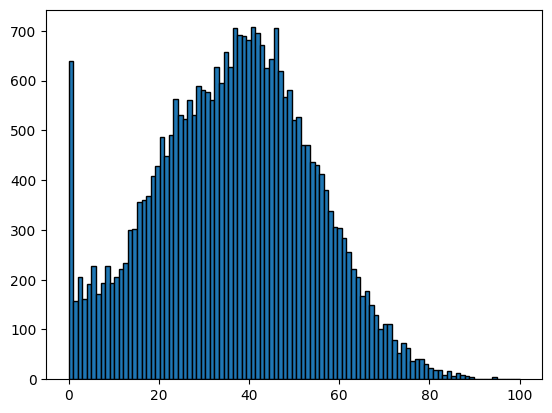

In [28]:
# Define the number of bins you want
num_bins = 100

# Create equal-sized bins using numpy's linspace function
bins = np.linspace(start=min(artists_dataset['popularity']), stop=max(artists_dataset['popularity']), num=num_bins)

# Plot the histogram with the defined bins
plt.hist(artists_dataset['popularity'], bins=bins, edgecolor='black')

# Show the plot
plt.show()

In [26]:
# How many values are in each bin
pd.cut(artists_dataset['popularity'], bins=bins).value_counts()

popularity
(33.333, 44.444]    7347
(22.222, 33.333]    6132
(44.444, 55.556]    5975
(11.111, 22.222]    3911
(55.556, 66.667]    3049
(0.0, 11.111]       2123
(66.667, 77.778]     947
(77.778, 88.889]     193
(88.889, 100.0]        9
Name: count, dtype: int64

In [34]:
# Number of rows with popularity ranging from 0 to 5
artists_dataset[(artists_dataset['popularity'] >= 0) & (artists_dataset['popularity'] <= 5)].shape[0]

1355

We can see that we are dealing mainly with artists that have a popularity score between 33 and 44, followed by artists with popularity score between 22 and 33, and with only 201 artists ranging from 77 to 100. Also we have many artists (451) with popularity score of 0 and 1355 artists ranging form 0 to 5. 

The **distribution** is almost symmetrical, the distribution peaks around the median popularity score, which is close to the mean popularity score, indicative of a more balanced distribution compared to the followers. 

Now let's analyze the distribution of the followers variable.

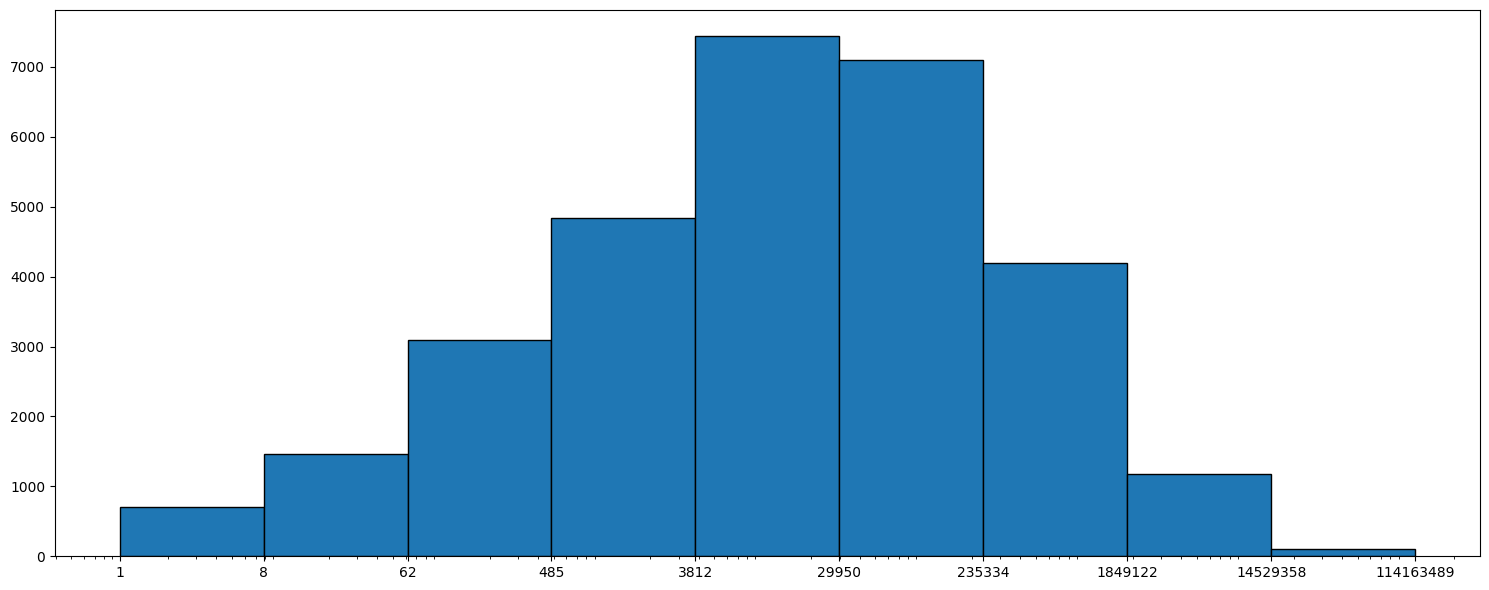

In [54]:
log_bins = np.logspace(np.log10(min(artists_dataset['followers'])), np.log10(max(artists_dataset['followers'])), num=num_bins)

# Plot the histogram with logarithmic bins
plt.figure(figsize=(15, 6))
plt.hist(artists_dataset['followers'], bins=log_bins, edgecolor='black')
plt.xscale('log')  # Set x-axis to logarithmic scale

# Set the x-axis to have ticks at the bin edges
plt.gca().xaxis.set_major_locator(ticker.FixedLocator(log_bins))  # Use FixedLocator to set the ticks

# Create custom tick labels for the bins
def custom_fmt(x, pos):
    return '{:.0f}'.format(x)
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(custom_fmt))

# Improve the layout
plt.tight_layout()

# Show the plot
plt.show()

We can see that, as expected the majority of artist has a small number of followers: the variable has a mean of approximately 416,866 and a median of 15,814 which suggests a right-skewed distribution, this also is confirmed by the histogram. The distributions of followers is heavily skewed, with a few artists having a very high number of followers and the majority having a relatively low number of followers. 

In [60]:
# Now let's check if we have duplicate names
duplicated_rows = artists_dataset[artists_dataset.duplicated('name', keep=False)]
duplicated_rows

,id,name,popularity,followers,genres
143,60alJNnwGVBdNXrx4kOfW0,Tatiana,50.0,68928.0,"['cancion infantil mexicana', 'musica para nin..."
175,41afDgAYLuPgxrh1idDJsD,Tatiana,15.0,819.0,[]
193,091dY4SjI2cy4YHdvhCjg1,Sasha,47.0,35929.0,[]
201,1UDjGxtS0sJPWn9Oc3M0Fn,Wheels on the Bus,42.0,26428.0,"[""children's music""]"
224,51ZPG7Kk4SfmmKFg0K6RBU,Hush Little Baby,28.0,438.0,[]
...,...,...,...,...,...
29904,2w5c2l70mYNDdSLifFyZjJ,Monty,33.0,17540.0,"['french dnb', 'halftime dnb']"
29913,4wTgto2eauupLwUCQ59vLK,DIESEL,9.0,10.0,[]
29978,7BXUVNB9LlrJ99RhTwFlqI,Oriente,6.0,1.0,[]
29986,3I6LbsaSbcArZLIslilSYu,RØRY,13.0,26.0,[]


We have 430 rows with duplicated names, hence we have two possibilities: 
- Dropping the rows with duplicated names
- Keeping the rows with duplicated names
- Keeping the rows with duplicated names and merging the popularity, followers and genres columns

In the data preparation phase, we will decide which approach to take.

In [56]:
# Now let's check if we have duplicate ids
artists_dataset['id'].duplicated().sum()

0

# Possible join of the datasets

A way to join the datasets could be to merge the datasets on the 'name' column in the 'artists' dataset and the 'artists' column in the 'tracks' dataset. However, the 'artists' column in the 'tracks' dataset contains multiple artists separated by a semicolon. To join the datasets on the 'artists' column, we need to extract the primary artist's name from the 'artists' column in the 'tracks' dataset. We can then merge the datasets on the primary artist's name.

In [ ]:
# Extract primary artist's name from the 'artists' column in the 'tracks' dataset
# Assuming the primary artist is the first listed in the 'artists' column
tracks_dataset['primary_artist'] = tracks_dataset['artists'].apply(lambda x: x.split(';')[0])

# Merge the datasets on artist name
merged_df = pd.merge(tracks_dataset, artists_dataset, how='left', left_on='primary_artist', right_on='name', suffixes=('_track', '_artist'))

# Drop the duplicated 'name' column and any other unnecessary columns from the merge
merged_df = merged_df.drop(columns=['name_artist'])

merged_df

However, this approach isn't perfect because the streams of the songs are distributed among all the artists as said by [spotify it's self](https://community.spotify.com/t5/Content-Questions/Two-main-artists-on-a-song/td-p/5826073). 

Then we can adopt a more inclusive approach and join for each artist linked in a track. This however, introduces complexity, as it requires expanding the tracks dataset to create a row for each artist-track combination before joining with the 'artists' dataset.


In [ ]:
# Create a new DataFrame to hold the expanded artist-track combinations
expanded_tracks_df = tracks_dataset.assign(artists=tracks_dataset['artists'].str.split(';')).explode('artists')

# Strip leading and trailing spaces from the exploded 'artists' column to ensure clean matching
expanded_tracks_df['artists'] = expanded_tracks_df['artists'].str.strip()

# Merge the expanded tracks dataset with the artists dataset on artist name
expanded_merged_df = pd.merge(expanded_tracks_df, artists_dataset, how='left', left_on='artists', right_on='name', suffixes=('_track', '_artist'))

# Preview the newly merged dataset
expanded_merged_df